In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import durbin_watson

In [266]:
data = pd.read_csv('genre_score.csv', encoding= 'CP949')
data

,날짜,장르,score
0,2018-01-31,OST,9.384574e+07
1,2018-01-31,댄스/팝,2.269774e+09
2,2018-01-31,락,6.051660e+07
3,2018-01-31,랩/힙합,3.623970e+08
4,2018-01-31,발라드,1.623663e+09
...,...,...,...
758,2023-06-30,알앤비/소울,2.061284e+08
759,2023-06-30,인디,2.723547e+08
760,2023-06-30,일렉트로닉,1.229840e+07
761,2023-06-30,팝,3.304241e+08


In [267]:
data['그룹별 순위'] = data.groupby('날짜')['score'].rank(method = 'min', ascending=False)

In [268]:
data

,날짜,장르,score,그룹별 순위
0,2018-01-31,OST,9.384574e+07,7.0
1,2018-01-31,댄스/팝,2.269774e+09,1.0
2,2018-01-31,락,6.051660e+07,9.0
3,2018-01-31,랩/힙합,3.623970e+08,5.0
4,2018-01-31,발라드,1.623663e+09,2.0
...,...,...,...,...
758,2023-06-30,알앤비/소울,2.061284e+08,5.0
759,2023-06-30,인디,2.723547e+08,4.0
760,2023-06-30,일렉트로닉,1.229840e+07,13.0
761,2023-06-30,팝,3.304241e+08,3.0


In [269]:
data = data.sort_values(by=['날짜','그룹별 순위'])

In [270]:
data.to_csv('가온차트_장르_전체순위.csv', encoding= 'cp949')

In [271]:
data

,날짜,장르,score,그룹별 순위
1,2018-01-31,댄스/팝,2.269774e+09,1.0
4,2018-01-31,발라드,1.623663e+09,2.0
6,2018-01-31,인디,7.275030e+08,3.0
5,2018-01-31,알앤비/소울,4.107884e+08,4.0
3,2018-01-31,랩/힙합,3.623970e+08,5.0
...,...,...,...,...
762,2023-06-30,포크/어쿠스틱,2.134592e+07,10.0
757,2023-06-30,성인가요,1.960391e+07,11.0
750,2023-06-30,OST,1.747987e+07,12.0
760,2023-06-30,일렉트로닉,1.229840e+07,13.0


In [272]:
data.value_counts('장르')

장르
팝          66
인디         66
알앤비/소울     66
발라드        66
랩/힙합       66
댄스/팝       66
락          62
OST        60
포크/어쿠스틱    54
일렉트로닉      52
성인가요       50
락/메탈       38
캐롤         30
댄스         15
J-POP       6
dtype: int64

In [273]:
data.groupby('날짜').head(3).value_counts('장르')

장르
발라드     66
댄스/팝    66
랩/힙합    37
인디      15
팝       14
dtype: int64

In [274]:
dance = data[data['장르'] == '댄스/팝'].iloc[:, 2]
balla = data[data['장르'] == '발라드'].iloc[:, 2]
rap = data[data['장르'] == '랩/힙합'].iloc[:, 2]
indie = data[data['장르'] == '인디'].iloc[:, 2]
pop = data[data['장르'] == '팝'].iloc[:, 2]

date = data[data['장르'] == '랩/힙합'].iloc[:, 0]
date[date.values == '2022-1-30'] = '2022-10-30'

new = pd.DataFrame(rap)
new.index = date

new = new.rename(columns={'score': 'rap'})
new['ballade'] = balla.values
new['dance'] = dance.values
new['pop'] = pop.values
new['indie'] = indie.values
new

,rap,ballade,dance,pop,indie
날짜,,,,,
2018-01-31,3.623970e+08,1.623663e+09,2.269774e+09,270830517.0,727503023.0
2018-02-28,4.554677e+08,1.393533e+09,2.031795e+09,305006326.0,510549561.0
2018-03-31,1.013953e+09,1.271269e+09,2.338536e+09,326752417.0,502535703.0
2018-04-30,1.560984e+09,1.445036e+09,1.889140e+09,296690229.0,446613486.0
2018-05-31,1.364214e+09,1.485689e+09,1.654716e+09,256369298.0,512413951.0
...,...,...,...,...,...
2023-02-28,2.532866e+08,8.039306e+08,1.604126e+09,379010329.0,312878448.0
2023-03-31,2.227832e+08,8.929763e+08,1.746562e+09,435865590.0,311229261.0
2023-04-30,2.214557e+08,8.283227e+08,2.164896e+09,405658714.0,301005400.0


<AxesSubplot:xlabel='날짜'>

C:\Users\hwi23\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hwi23\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hwi23\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\hwi23\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)


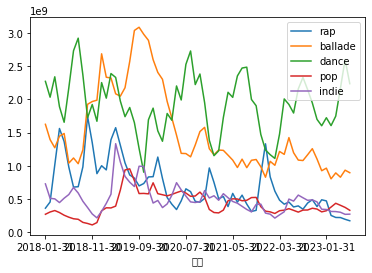

In [275]:
new.plot()

In [276]:
adfuller_test = adfuller(new['rap'], autolag= "AIC")
print("Rap ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))
print("5% : {}\n".format(adfuller_test[4]['5%']))

adfuller_test = adfuller(new['ballade'], autolag= "AIC")
print("Ballade ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))
print("5% : {}\n".format(adfuller_test[4]['5%']))

adfuller_test = adfuller(new['dance'], autolag= "AIC")
print("Dance ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))
print("5% : {}\n".format(adfuller_test[4]['5%']))

adfuller_test = adfuller(new['pop'], autolag= "AIC")
print("Pop ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))
print("5% : {}\n".format(adfuller_test[4]['5%']))

adfuller_test = adfuller(new['indie'], autolag= "AIC")
print("Indie ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))
print("5% : {}\n".format(adfuller_test[4]['5%']))


Rap ADF test statistic: -0.7453015050411071
p-value: 0.8346639988336522
5% : -2.910236235808284

Ballade ADF test statistic: -1.2337283067868485
p-value: 0.6589210224228419
5% : -2.9071540828402367

Dance ADF test statistic: -4.052346405637567
p-value: 0.0011598985735579792
5% : -2.910236235808284

Pop ADF test statistic: -2.5747263229194663
p-value: 0.09833413394654639
5% : -2.9110731481481484

Indie ADF test statistic: -3.0160649313205012
p-value: 0.03342113101204068
5% : -2.9071540828402367



In [277]:
# new_diff = new.diff().dropna()
new_diff = new.copy()

new_diff['rap'] = new_diff['rap'].diff().bfill()
new_diff['ballade'] = new_diff['ballade'].diff().bfill()
new_diff['pop'] = new_diff['pop'].diff().bfill()

In [278]:
new_diff

,rap,ballade,dance,pop,indie
날짜,,,,,
2018-01-31,93070670.0,-230130134.0,2.269774e+09,34175809.0,727503023.0
2018-02-28,93070670.0,-230130134.0,2.031795e+09,34175809.0,510549561.0
2018-03-31,558485007.0,-122263323.0,2.338536e+09,21746091.0,502535703.0
2018-04-30,547031225.0,173767101.0,1.889140e+09,-30062188.0,446613486.0
2018-05-31,-196770401.0,40652531.0,1.654716e+09,-40320931.0,512413951.0
...,...,...,...,...,...
2023-02-28,-218376689.0,-160371563.0,1.604126e+09,55234798.0,312878448.0
2023-03-31,-30503400.0,89045715.0,1.746562e+09,56855261.0,311229261.0
2023-04-30,-1327527.0,-64653637.0,2.164896e+09,-30206876.0,301005400.0


In [279]:
new

,rap,ballade,dance,pop,indie
날짜,,,,,
2018-01-31,3.623970e+08,1.623663e+09,2.269774e+09,270830517.0,727503023.0
2018-02-28,4.554677e+08,1.393533e+09,2.031795e+09,305006326.0,510549561.0
2018-03-31,1.013953e+09,1.271269e+09,2.338536e+09,326752417.0,502535703.0
2018-04-30,1.560984e+09,1.445036e+09,1.889140e+09,296690229.0,446613486.0
2018-05-31,1.364214e+09,1.485689e+09,1.654716e+09,256369298.0,512413951.0
...,...,...,...,...,...
2023-02-28,2.532866e+08,8.039306e+08,1.604126e+09,379010329.0,312878448.0
2023-03-31,2.227832e+08,8.929763e+08,1.746562e+09,435865590.0,311229261.0
2023-04-30,2.214557e+08,8.283227e+08,2.164896e+09,405658714.0,301005400.0


In [280]:
adfuller_test = adfuller(new_diff['rap'], autolag= "AIC")
print("Rap ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))
print("5% : {}\n".format(adfuller_test[4]['5%']))

adfuller_test = adfuller(new_diff['ballade'], autolag= "AIC")
print("Ballade ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))
print("5% : {}\n".format(adfuller_test[4]['5%']))

adfuller_test = adfuller(new_diff['dance'], autolag= "AIC")
print("Dance ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))
print("5% : {}\n".format(adfuller_test[4]['5%']))

adfuller_test = adfuller(new_diff['pop'], autolag= "AIC")
print("Pop ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))
print("5% : {}\n".format(adfuller_test[4]['5%']))

adfuller_test = adfuller(new_diff['indie'], autolag= "AIC")
print("Indie ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))
print("5% : {}\n".format(adfuller_test[4]['5%']))


Rap ADF test statistic: -8.976565719070459
p-value: 7.504295058458964e-15
5% : -2.9094272025108254

Ballade ADF test statistic: -6.926907302230045
p-value: 1.1093092699909213e-09
5% : -2.9071540828402367

Dance ADF test statistic: -4.052346405637567
p-value: 0.0011598985735579792
5% : -2.910236235808284

Pop ADF test statistic: -6.145326896038746
p-value: 7.792331420991062e-08
5% : -2.9086446751210775

Indie ADF test statistic: -3.0160649313205012
p-value: 0.03342113101204068
5% : -2.9071540828402367



<AxesSubplot:xlabel='날짜'>

C:\Users\hwi23\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hwi23\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hwi23\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\hwi23\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)


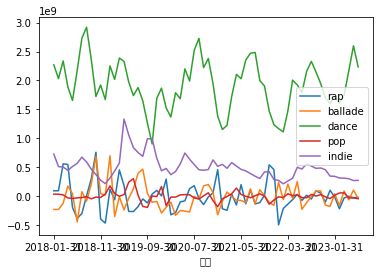

In [281]:
new_diff.plot()

In [282]:
train = new.iloc[:-14,:]
test = new.iloc[-14:,:]
train.iloc[0]

rap        3.623970e+08
ballade    1.623663e+09
dance      2.269774e+09
pop        2.708305e+08
indie      7.275030e+08
Name: 2018-01-31, dtype: float64

In [283]:
var = VAR(train ,freq='M')
var.select_order(maxlags=7).summary()

,AIC,BIC,FPE,HQIC
0,195.6,195.8,8.941e+84,195.7
1,191.0,192.2*,9.246e+82,191.5
2,190.6,192.8,6.013e+82,191.4
3,190.5,193.7,6.230e+82,191.7
4,190.2,194.4,5.683e+82,191.7
5,189.9,195.1,6.671e+82,191.8
6,189.3,195.5,7.611e+82,191.6
7,186.3*,193.5,1.567e+82*,189.0*


In [284]:
train_norm = (train / train.iloc[0])-1
train_norm

,rap,ballade,dance,pop,indie
날짜,,,,,
2018-01-31,0.000000,0.000000,0.000000,0.000000,0.000000
2018-02-28,0.256820,-0.141735,-0.104847,0.126189,-0.298217
2018-03-31,1.797906,-0.217036,0.030295,0.206483,-0.309232
2018-04-30,3.307386,-0.110014,-0.167697,0.095483,-0.386101
2018-05-31,2.764417,-0.084977,-0.270978,-0.053396,-0.295654
2018-06-30,1.702899,-0.359397,-0.042004,-0.162628,-0.219622
2018-07-31,0.875680,-0.312001,0.202751,-0.249618,-0.073784
2018-08-31,0.890774,-0.364912,0.286322,-0.279170,-0.188232
2018-09-30,1.715789,-0.237178,0.042238,-0.450984,-0.359280


In [285]:
adfuller_test = adfuller(train_norm['rap'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))
print("5% : {}".format(adfuller_test[4]['5%']))

adfuller_test = adfuller(train_norm['ballade'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))
print("5% : {}".format(adfuller_test[4]['5%']))

adfuller_test = adfuller(train_norm['dance'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))
print("5% : {}".format(adfuller_test[4]['5%']))

adfuller_test = adfuller(train_norm['pop'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))
print("5% : {}".format(adfuller_test[4]['5%']))

adfuller_test = adfuller(train_norm['indie'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))
print("5% : {}".format(adfuller_test[4]['5%']))

ADF test statistic: -1.185961053216388
p-value: 0.6796055695144324
5% : -2.925338105429433
ADF test statistic: -1.2000944550959707
p-value: 0.6735550784149926
5% : -2.920142229157715
ADF test statistic: -3.817740168074866
p-value: 0.002730936697360046
5% : -2.922629480573571
ADF test statistic: -2.621411367181976
p-value: 0.08865222474577411
5% : -2.92135992
ADF test statistic: -2.7533393678536684
p-value: 0.06525420108713104
5% : -2.920142229157715


In [286]:
var_norm = VAR(train_norm, freq= 'M')
var_norm.select_order(maxlags=7).summary()

,AIC,BIC,FPE,HQIC
0,-8.955,-8.754,0.0001291,-8.880
1,-13.53,-12.33*,1.335e-06,-13.09
2,-14.01,-11.80,8.683e-07,-13.18
3,-14.08,-10.87,8.996e-07,-12.89
4,-14.40,-10.19,8.207e-07,-12.83
5,-14.67,-9.447,9.634e-07,-12.72
6,-15.29,-9.067,1.099e-06,-12.97
7,-18.29*,-11.06,2.263e-07*,-15.59*


In [287]:
model = var_norm.fit(7)
model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 27, Jul, 2023
Time:                     10:57:02
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -11.0609
Nobs:                     45.0000    HQIC:                  -15.5935
Log likelihood:           272.208    FPE:                2.26299e-07
AIC:                     -18.2875    Det(Omega_mle):     1.19762e-08
--------------------------------------------------------------------
Results for equation rap
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             -2.592758         1.869067           -1.387           0.165
L1.rap             0.600147         0.320873            1.870           0.061
L1.ballade        -1.298441         1.912045           -0.679           0.

In [288]:
model.resid.corr()

,rap,ballade,dance,pop,indie
rap,1.000000,0.139686,-0.429413,-0.143226,-0.242180
ballade,0.139686,1.000000,0.006964,0.767502,-0.099320
dance,-0.429413,0.006964,1.000000,-0.115810,0.056149
pop,-0.143226,0.767502,-0.115810,1.000000,0.179863
indie,-0.242180,-0.099320,0.056149,0.179863,1.000000


In [289]:
durbin_res = pd.DataFrame([model.resid.columns, 
                           [round(x,2) for x in durbin_watson(model.resid)]]).T
durbin_res.set_index([0])

,1
0,
rap,2.21
ballade,2.21
dance,2.49
pop,2.52
indie,2.73


In [290]:
# model = var_norm.fit(14)
# model.summary()

In [291]:
# forecasting_model = VAR(train)
# results_aic = []
# for p in range(1,20):
#   results = forecasting_model.fit(p)
#   results_aic.append(results.aic)

In [292]:
# sns.set()
# plt.plot(list(np.arange(1,10,1)), results_aic)
# plt.xlabel("Order")
# plt.ylabel("AIC")
# plt.show()


In [293]:
# results = forecasting_model.fit(8)
# results.summary()

In [294]:
laaged_values = train_norm.values[-14:]
forecast = pd.DataFrame(model.forecast(y= laaged_values, steps=14), index = test.index, columns= ['rap', 'ballade', 'dance','pop', 'indie'])
forecast

,rap,ballade,dance,pop,indie
날짜,,,,,
2022-05-31,-0.018029,-0.508489,0.137748,-0.206898,0.003820
2022-06-30,0.764625,-0.631339,0.158059,0.027908,0.317118
2022-07-31,1.184100,-0.588701,0.257536,0.834971,-0.031755
2022-08-31,0.243788,-0.621124,0.254110,1.554120,-0.419794
2022-09-30,0.736433,-0.346028,0.134209,1.314640,-0.409919
2022-10-30,0.842914,-0.114508,-0.254017,0.904334,-0.392911
2022-11-30,0.559457,-0.045386,-0.506088,0.474217,-0.644920
2022-12-31,0.847834,-0.011278,-0.589685,0.026223,-0.490573
2023-01-31,1.382276,-0.024464,-0.522041,-0.297830,-0.409266


In [295]:
train.iloc[0]

rap        3.623970e+08
ballade    1.623663e+09
dance      2.269774e+09
pop        2.708305e+08
indie      7.275030e+08
Name: 2018-01-31, dtype: float64

In [296]:
df_f_denorm = (forecast + 1).mul(train.iloc[0].to_numpy())
df_f_denorm

,rap,ballade,dance,pop,indie
날짜,,,,,
2022-05-31,3.558635e+08,7.980480e+08,2.582430e+09,2.147961e+08,7.302823e+08
2022-06-30,6.394949e+08,5.985817e+08,2.628533e+09,2.783889e+08,9.582076e+08
2022-07-31,7.915114e+08,6.678115e+08,2.854323e+09,4.969660e+08,7.044011e+08
2022-08-31,4.507449e+08,6.151676e+08,2.846547e+09,6.917336e+08,4.221016e+08
2022-09-30,6.292780e+08,1.061830e+09,2.574398e+09,6.268752e+08,4.292855e+08
2022-10-30,6.678666e+08,1.437740e+09,1.693213e+09,5.157518e+08,4.416590e+08
2022-11-30,5.651425e+08,1.549971e+09,1.121070e+09,3.992629e+08,2.583218e+08
2022-12-31,6.696495e+08,1.605352e+09,9.313224e+08,2.779326e+08,3.706100e+08
2023-01-31,8.633296e+08,1.583942e+09,1.084859e+09,1.901690e+08,4.297608e+08


In [297]:
train['rap'].iloc[-1]

422585250.0

In [298]:
train

,rap,ballade,dance,pop,indie
날짜,,,,,
2018-01-31,3.623970e+08,1.623663e+09,2.269774e+09,270830517.0,7.275030e+08
2018-02-28,4.554677e+08,1.393533e+09,2.031795e+09,305006326.0,5.105496e+08
2018-03-31,1.013953e+09,1.271269e+09,2.338536e+09,326752417.0,5.025357e+08
2018-04-30,1.560984e+09,1.445036e+09,1.889140e+09,296690229.0,4.466135e+08
2018-05-31,1.364214e+09,1.485689e+09,1.654716e+09,256369298.0,5.124140e+08
2018-06-30,9.795226e+08,1.040123e+09,2.174435e+09,226786016.0,5.677272e+08
2018-07-31,6.797408e+08,1.117078e+09,2.729974e+09,203226336.0,6.738251e+08
2018-08-31,6.852107e+08,1.031169e+09,2.919660e+09,195222727.0,5.905638e+08
2018-09-30,9.841937e+08,1.238566e+09,2.365645e+09,148690251.0,4.661255e+08


In [299]:
# df_f_denorm['rap_forecasted'] = np.r_[train['rap'].iloc[-1], df_f_denorm['rap'].cumsum()[1:]]
# df_f_denorm['rap_forecasted'_2] = new["rap"].iloc[-14-1] + df_f_denorm['rap'].cumsum()

# df_f_denorm['ballade_forecasted'] = np.r_[train['ballade'].iloc[-1], df_f_denorm['ballade'].cumsum()[1:]]
# df_f_denorm['ballade_forecasted_2'] = new["ballade"].iloc[-14-1] + df_f_denorm['ballade'].cumsum()

# df_f_denorm['pop_forecasted'] = np.r_[train['pop'].iloc[-1], df_f_denorm['pop'].cumsum()[1:]]
# df_f_denorm['pop_forecasted_2'] = new["pop"].iloc[-14-1] + df_f_denorm['pop'].cumsum()
# df_f_denorm

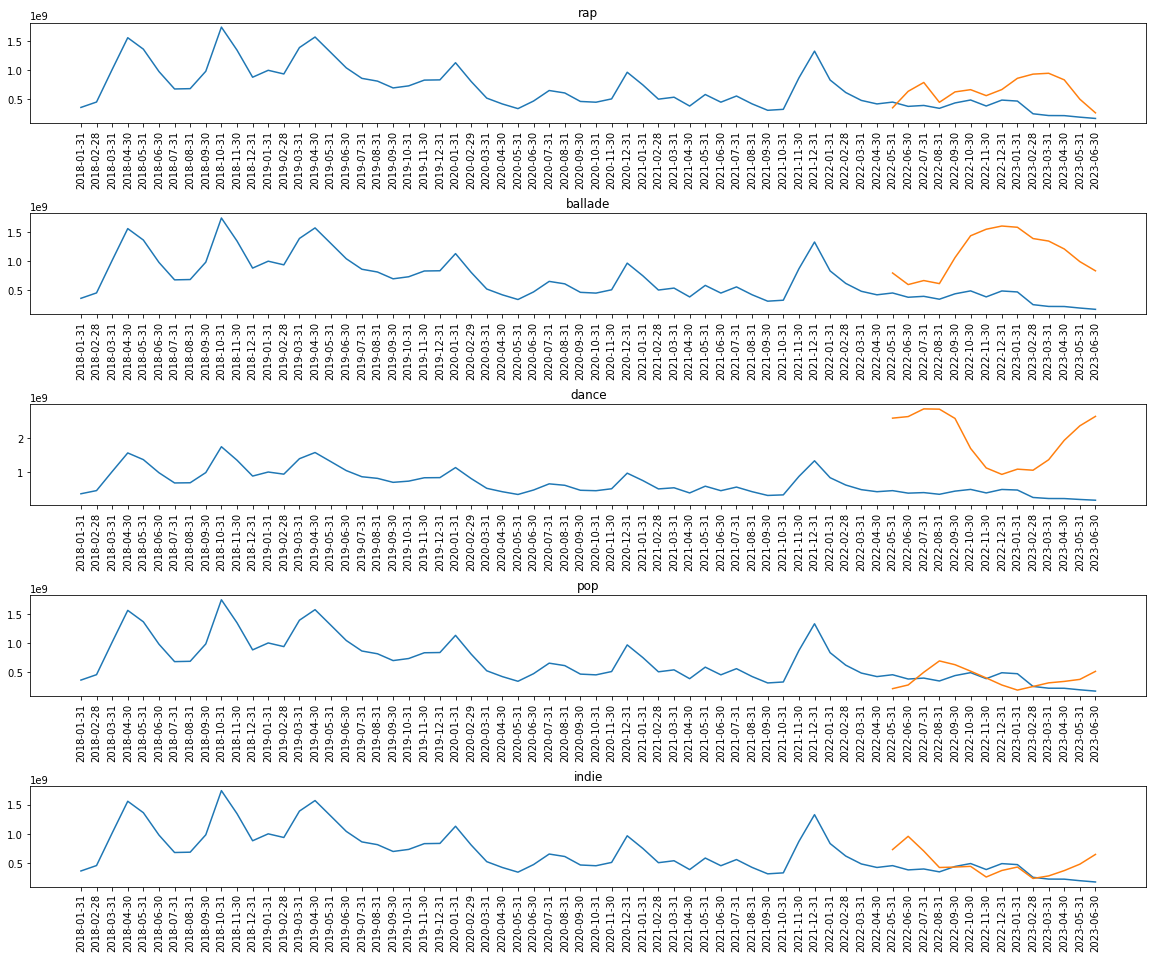

In [300]:
plt.figure(figsize =(20,15))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.9)

plt.subplot(511)
plt.plot(new.index, new['rap'].values, test.index, df_f_denorm['rap'].values)
plt.title('rap')
plt.xticks(rotation=90)

plt.subplot(512)
plt.plot(new.index, new['rap'].values, test.index, df_f_denorm['ballade'].values)
plt.title('ballade')
plt.xticks(rotation=90)

plt.subplot(513)
plt.plot(new.index, new['rap'].values, test.index, df_f_denorm['dance'].values)
plt.title('dance')
plt.xticks(rotation=90)

plt.subplot(514)
plt.plot(new.index, new['rap'].values, test.index, df_f_denorm['pop'].values)
plt.title('pop')
plt.xticks(rotation=90)

plt.subplot(515)
plt.plot(new.index, new['rap'].values, test.index, df_f_denorm['indie'].values)
plt.title('indie')
plt.xticks(rotation=90)

plt.show()

In [301]:
# forecast["rap_forecasted"] = new["rap"].iloc[-6-1] + forecast['rap'].cumsum()
# forecast["ballade_forecasted"] = new["ballade"].iloc[-6-1] + forecast['ballade'].cumsum()
# forecast["dance_forecasted"] = new["dance"].iloc[-6-1] + forecast['dance'].cumsum()
# forecast["pop_forecasted"] = new["pop"].iloc[-6-1] + forecast['pop'].cumsum()  
# forecast["indie_forecasted"] = new["indie"].iloc[-6-1] + forecast['indie'].cumsum()
# forecast

In [302]:
# test = new.iloc[-6:,:]
# test

In [303]:

# test["rap_forecasted"] = forecast["rap_forecasted"]
# test["ballade_forecasted"] = forecast["ballade_forecasted"]
# test["dance_forecasted"] = forecast["dance_forecasted"]
# test["indie_forecasted"] = forecast["indie_forecasted"]
# test["pop_forecasted"] = forecast["pop_forecasted"]
# test.plot()
# # plt.plot(test.index, test.index, test['rap_forecasted'])

# # plt.show()